<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_Viral_python_100000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

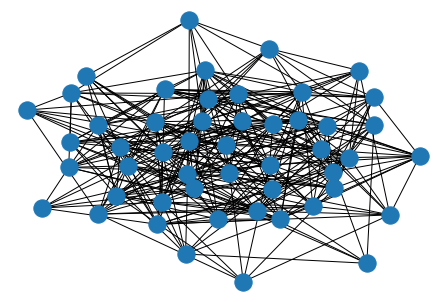

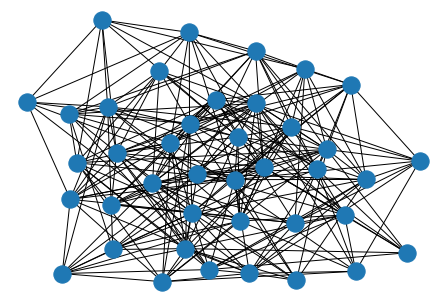

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 100000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 [0 1 0 ... 1 1 0]
 ...
 [0 0 1 ... 0 1 0]
 [0 1 1 ... 1 0 1]
 [0 0 0 ... 0 1 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:                       
                      #PN=min(Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I'],Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I'],Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I'])/min(Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']**2+N,Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+N,Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+N)
                      PNN2 = .1*(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = .1*(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = 1 - PNN2 - PNN3
                      next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      
                      #PN1 = min(Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I'],Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I'],Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I'])/min(Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']**2+N,Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+N,Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+N)
                      #PN1 = PN1/3
                      #P1 = 1-PN1
                      PNN2 = .3*(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = .3*(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = 1 - PNN2 - PNN3
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .0625:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430]
[1973, 4388, 9519, 19212, 32510, 48246, 60744, 64229, 56866, 42865, 27363, 15186, 7735, 3829, 1827, 887, 453, 228, 106, 51, 31, 14, 11, 5, 2, 0]
[0, 0, 0, 0, 1973, 4388, 9519, 19212, 34483, 52634, 70263, 83441, 91349, 95499, 97626, 98627, 99084, 99328, 99453, 99514, 99537, 99556, 99559, 99565, 99568, 99570]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430]]
[[], [1973, 4388, 9519, 19212, 32510, 48246, 60744, 64229, 56866, 42865, 27363, 15186, 7735, 3829, 1827, 887, 453, 228, 106, 51, 31, 14, 11, 5, 2, 0]]
[[], [0, 0, 0, 0, 1973, 4388, 9519, 19212, 34483, 52634, 70263, 83441, 91349, 95499, 97626, 98627, 99084, 99328, 99453, 99514, 99537, 99556, 99559, 99565, 99568, 99570]]


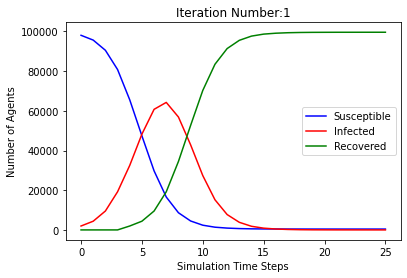

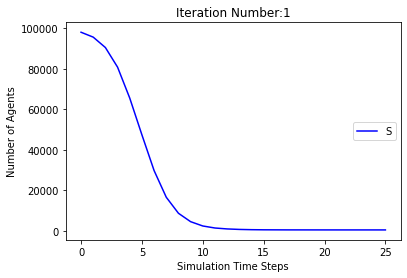

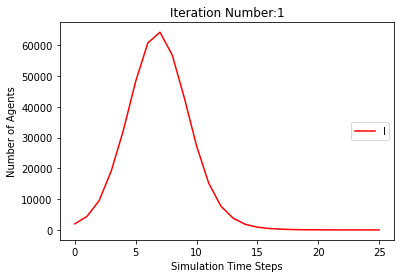

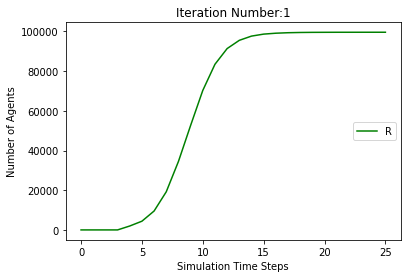

[98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419]
[1973, 4332, 9290, 18423, 31034, 46786, 59439, 63542, 57229, 43856, 28657, 16577, 8841, 4367, 2073, 978, 472, 222, 112, 57, 30, 17, 10, 4, 2, 1, 0]
[0, 0, 0, 0, 1973, 4332, 9290, 18423, 33007, 51118, 68729, 81965, 90236, 94974, 97386, 98542, 99077, 99341, 99459, 99520, 99549, 99563, 99571, 99577, 99579, 99580, 99581]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419]]
[[], [1973, 4388, 9519, 19212, 32510, 48246, 60744, 64229, 56866, 42865, 27363, 15186, 7735, 3829, 1827, 887, 453, 228, 106, 51, 31, 14, 11, 5, 2, 0], [1973, 4332, 9290, 18423, 31034, 46786, 59439, 63542, 57229,

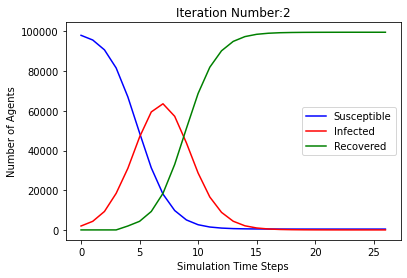

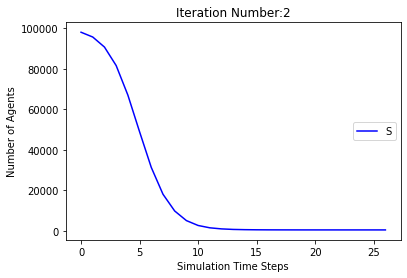

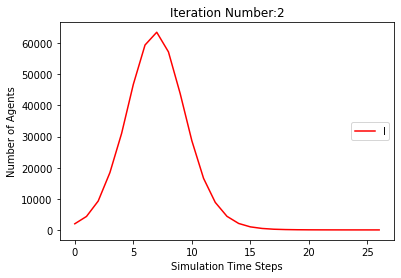

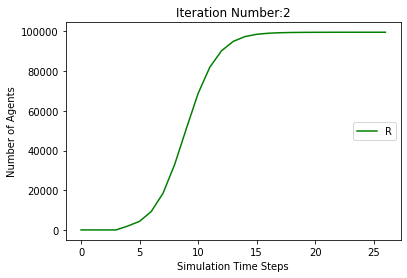

[98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487]
[1973, 4269, 9166, 18776, 31863, 47339, 60016, 63705, 56725, 43302, 28031, 15886, 8383, 4314, 2149, 1069, 535, 274, 143, 74, 33, 14, 7, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 1973, 4269, 9166, 18776, 33836, 51608, 69182, 82481, 90561, 94910, 97213, 98367, 98944, 99224, 99362, 99436, 99479, 99498, 99505, 99510, 99512, 99512, 99512, 99513]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487]]
[[], [1973, 4388, 9519, 19212, 3

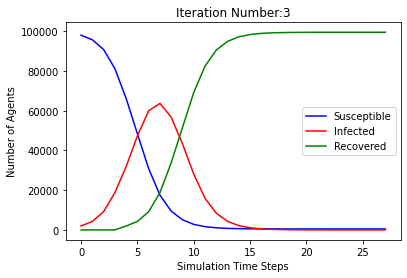

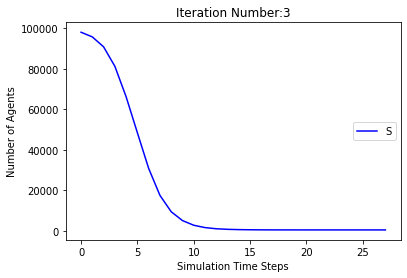

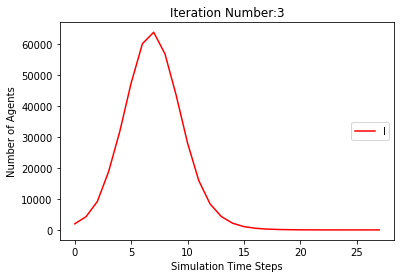

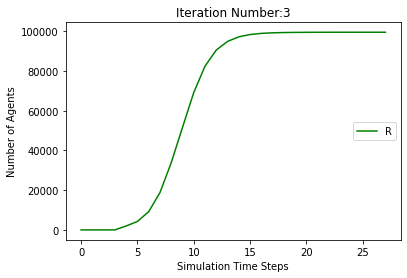

[98027, 95663, 90623, 81261, 66407, 48342, 30505, 16755, 8299, 3822, 1715, 892, 573, 449, 382, 357, 345, 336, 330, 329, 327, 325, 325, 324, 324, 324, 324, 324]
[1973, 4337, 9377, 18739, 31620, 47321, 60118, 64506, 58108, 44520, 28790, 15863, 7726, 3373, 1333, 535, 228, 113, 52, 28, 18, 11, 5, 5, 3, 1, 1, 0]
[0, 0, 0, 0, 1973, 4337, 9377, 18739, 33593, 51658, 69495, 83245, 91701, 96178, 98285, 99108, 99427, 99551, 99618, 99643, 99655, 99664, 99670, 99671, 99673, 99675, 99675, 99676]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 

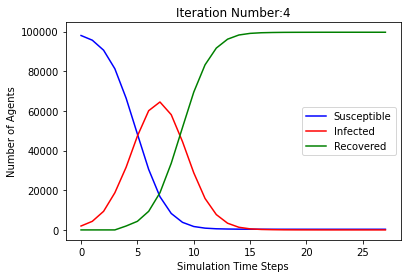

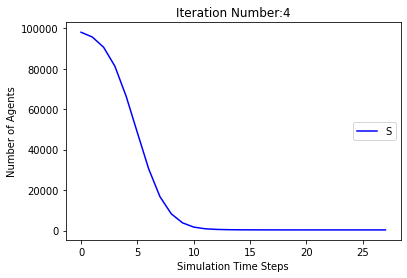

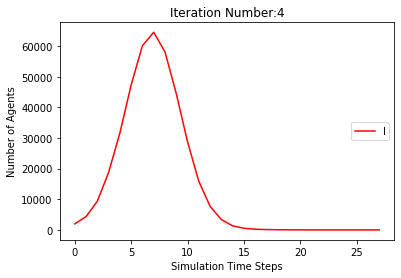

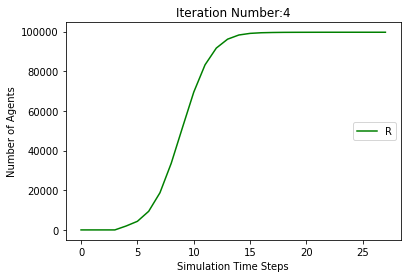

[98027, 95608, 90591, 81349, 66396, 47910, 29901, 16212, 8092, 3825, 1893, 1047, 652, 486, 400, 365, 345, 335, 334, 333, 332, 332, 332, 332, 332]
[1973, 4392, 9409, 18651, 31631, 47698, 60690, 65137, 58304, 44085, 28008, 15165, 7440, 3339, 1493, 682, 307, 151, 66, 32, 13, 3, 2, 1, 0]
[0, 0, 0, 0, 1973, 4392, 9409, 18651, 33604, 52090, 70099, 83788, 91908, 96175, 98107, 98953, 99348, 99514, 99600, 99635, 99655, 99665, 99666, 99667, 99668]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 48342, 30505, 16755, 8299, 3822, 1715, 892, 5

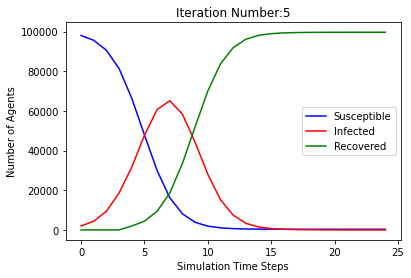

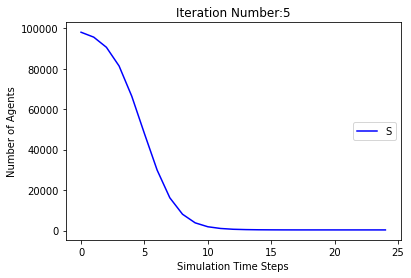

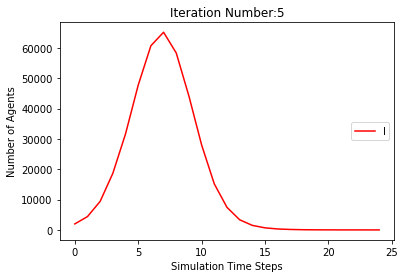

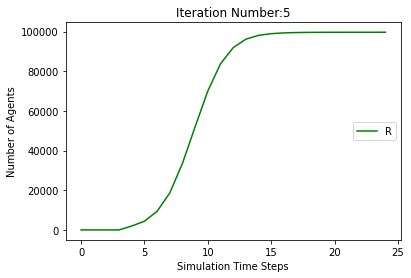

[98027, 95721, 90908, 82033, 67929, 50514, 33578, 19794, 10718, 5630, 2887, 1552, 978, 730, 626, 565, 532, 514, 511, 509, 507, 507, 507, 507, 507]
[1973, 4279, 9092, 17967, 30098, 45207, 57330, 62239, 57211, 44884, 30691, 18242, 9740, 4900, 2261, 987, 446, 216, 115, 56, 25, 7, 4, 2, 0]
[0, 0, 0, 0, 1973, 4279, 9092, 17967, 32071, 49486, 66422, 80206, 89282, 94370, 97113, 98448, 99022, 99270, 99374, 99435, 99468, 99486, 99489, 99491, 99493]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 48342, 30505, 16755, 8299, 3822, 1715, 892,

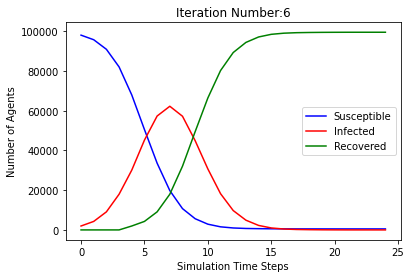

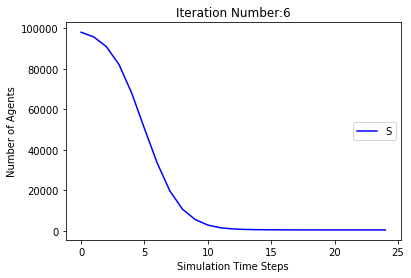

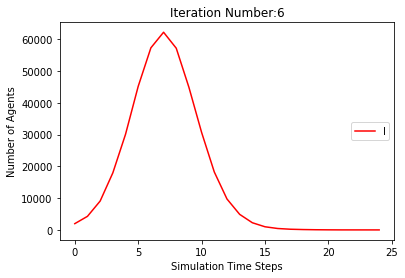

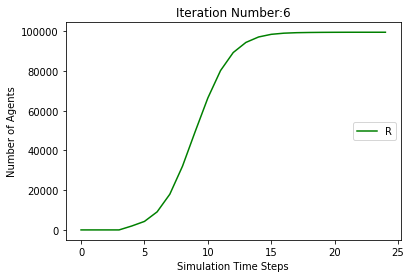

[98027, 95624, 90536, 81189, 66550, 48663, 31341, 18170, 9952, 5414, 2894, 1587, 973, 691, 554, 495, 469, 451, 446, 444, 442, 442, 442, 442, 442]
[1973, 4376, 9464, 18811, 31477, 46961, 59195, 63019, 56598, 43249, 28447, 16583, 8979, 4723, 2340, 1092, 504, 240, 108, 51, 27, 9, 4, 2, 0]
[0, 0, 0, 0, 1973, 4376, 9464, 18811, 33450, 51337, 68659, 81830, 90048, 94586, 97106, 98413, 99027, 99309, 99446, 99505, 99531, 99549, 99554, 99556, 99558]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 48342, 30505, 16755, 8299, 3822, 1715, 892,

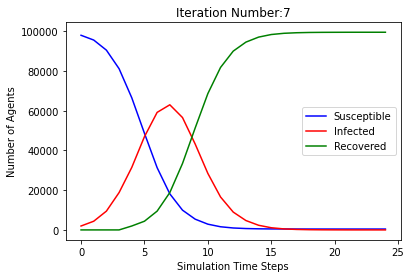

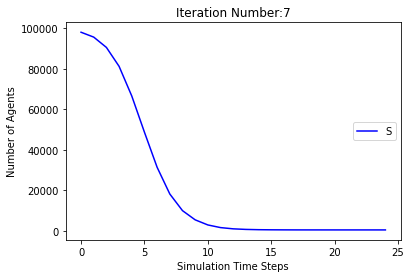

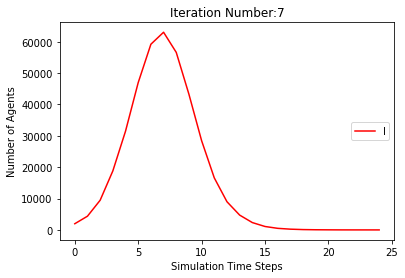

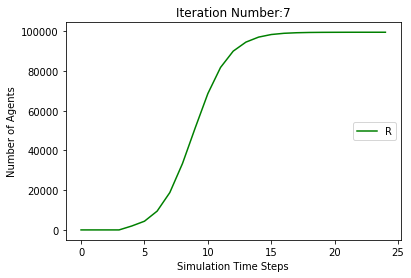

[98027, 95656, 90568, 80928, 65341, 46672, 29297, 16631, 8924, 4709, 2469, 1402, 962, 720, 585, 508, 473, 456, 448, 442, 440, 439, 438, 438, 437, 437, 436, 436, 436, 436, 436]
[1973, 4344, 9432, 19072, 32686, 48984, 61271, 64297, 56417, 41963, 26828, 15229, 7962, 3989, 1884, 894, 489, 264, 137, 66, 33, 17, 10, 4, 3, 2, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 1973, 4344, 9432, 19072, 34659, 53328, 70703, 83369, 91076, 95291, 97531, 98598, 99038, 99280, 99415, 99492, 99527, 99544, 99552, 99558, 99560, 99561, 99562, 99562, 99563, 99563, 99564]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487,

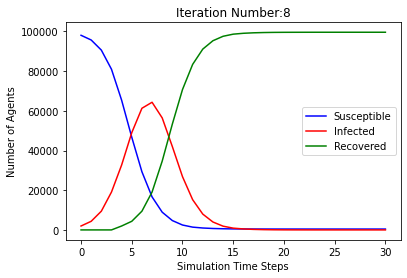

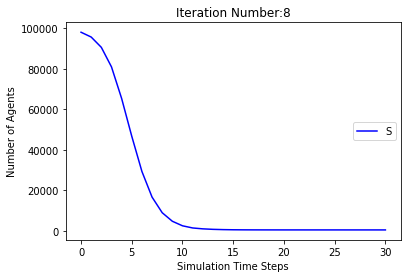

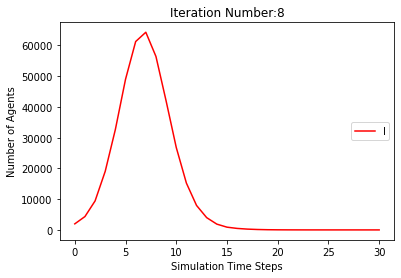

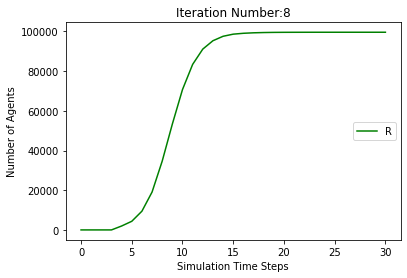

[98027, 95617, 90506, 81100, 66699, 48444, 30048, 16558, 8360, 4115, 2086, 1135, 691, 542, 464, 418, 393, 379, 374, 373, 371, 369, 368, 368, 368, 368, 368]
[1973, 4383, 9494, 18900, 31328, 47173, 60458, 64542, 58339, 44329, 27962, 15423, 7669, 3573, 1622, 717, 298, 163, 90, 45, 22, 10, 6, 5, 3, 1, 0]
[0, 0, 0, 0, 1973, 4383, 9494, 18900, 33301, 51556, 69952, 83442, 91640, 95885, 97914, 98865, 99309, 99458, 99536, 99582, 99607, 99621, 99626, 99627, 99629, 99631, 99632]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 48342, 30505, 

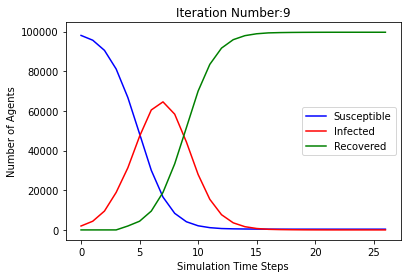

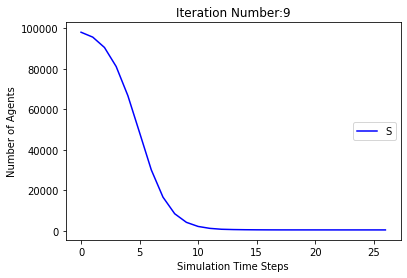

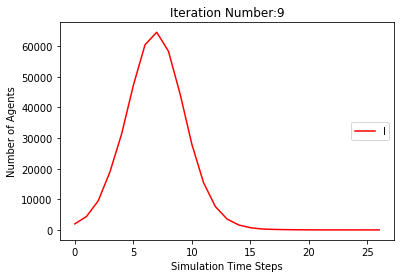

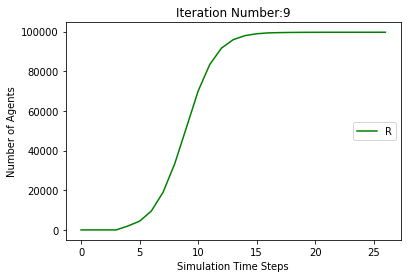

[98027, 95694, 90826, 81705, 67038, 49154, 31336, 17579, 9128, 4592, 2264, 1173, 738, 544, 465, 412, 398, 389, 385, 383, 383, 382, 382, 382, 382, 382]
[1973, 4306, 9174, 18295, 30989, 46540, 59490, 64126, 57910, 44562, 29072, 16406, 8390, 4048, 1799, 761, 340, 155, 80, 29, 15, 7, 3, 1, 1, 0]
[0, 0, 0, 0, 1973, 4306, 9174, 18295, 32962, 50846, 68664, 82421, 90872, 95408, 97736, 98827, 99262, 99456, 99535, 99588, 99602, 99611, 99615, 99617, 99617, 99618]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 48342, 30505, 16755, 8299, 382

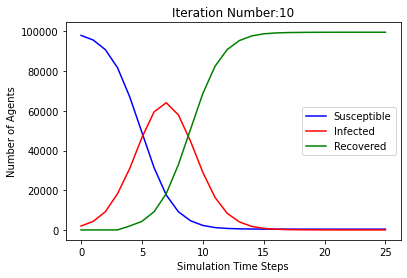

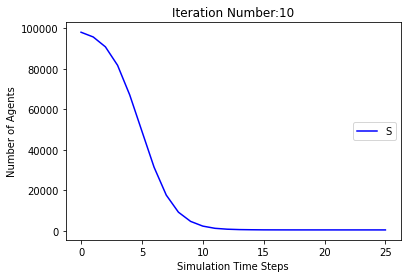

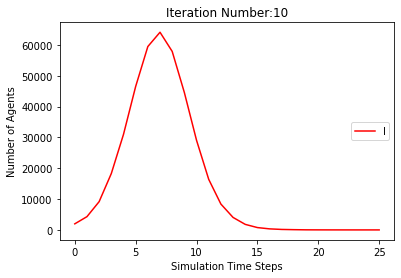

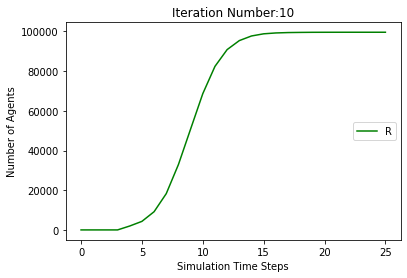

[98027, 95580, 90484, 81045, 66095, 47436, 29358, 15967, 7944, 3834, 1883, 983, 599, 426, 364, 331, 316, 315, 314, 313, 313, 313, 313, 313]
[1973, 4420, 9516, 18955, 31932, 48144, 61126, 65078, 58151, 43602, 27475, 14984, 7345, 3408, 1519, 652, 283, 111, 50, 18, 3, 2, 1, 0]
[0, 0, 0, 0, 1973, 4420, 9516, 18955, 33905, 52564, 70642, 84033, 92056, 96166, 98117, 99017, 99401, 99574, 99636, 99669, 99684, 99685, 99686, 99687]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 48342, 30505, 16755, 8299, 3822, 1715, 892, 573, 449, 382, 357

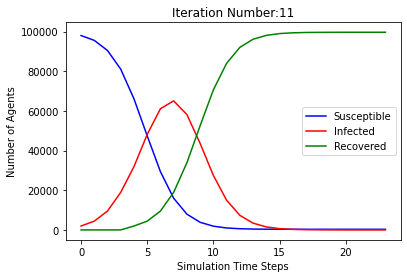

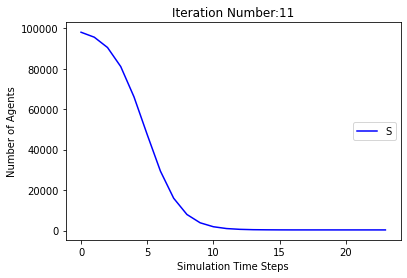

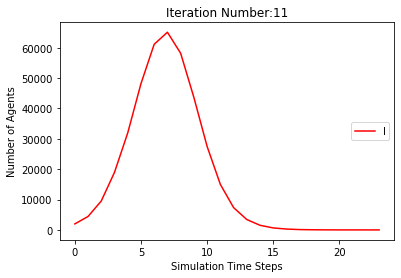

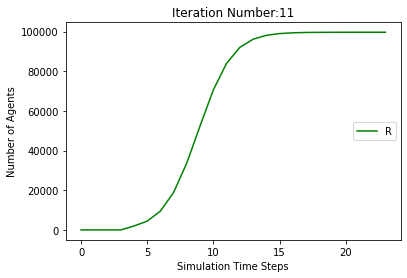

[98027, 95676, 90728, 81368, 66616, 48224, 30374, 16956, 8763, 4320, 2118, 1110, 686, 520, 423, 375, 357, 352, 345, 344, 343, 343, 343, 343, 343]
[1973, 4324, 9272, 18632, 31411, 47452, 60354, 64412, 57853, 43904, 28256, 15846, 8077, 3800, 1695, 735, 329, 168, 78, 31, 14, 9, 2, 1, 0]
[0, 0, 0, 0, 1973, 4324, 9272, 18632, 33384, 51776, 69626, 83044, 91237, 95680, 97882, 98890, 99314, 99480, 99577, 99625, 99643, 99648, 99655, 99656, 99657]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 48342, 30505, 16755, 8299, 3822, 1715, 892, 5

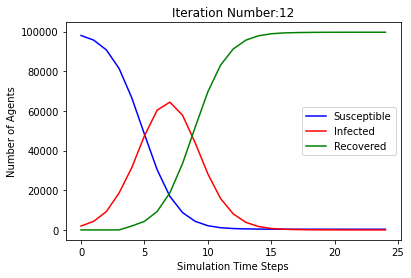

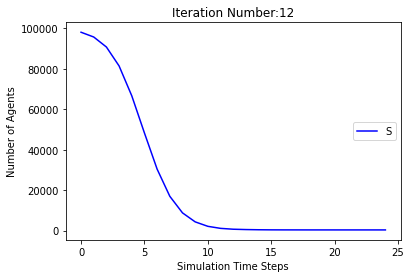

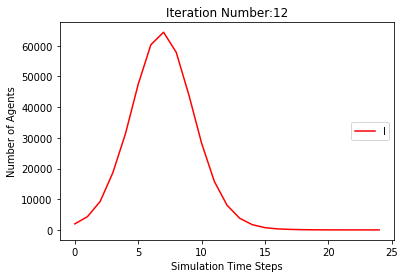

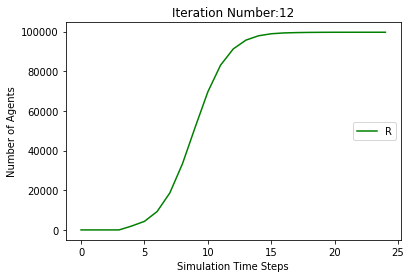

[98027, 95786, 91033, 82143, 67887, 50625, 33350, 19879, 11154, 6005, 3179, 1724, 1024, 739, 591, 514, 492, 474, 467, 463, 456, 451, 449, 445, 443, 442, 442, 442, 442, 442]
[1973, 4214, 8967, 17857, 30140, 45161, 57683, 62264, 56733, 44620, 30171, 18155, 10130, 5266, 2588, 1210, 532, 265, 124, 51, 36, 23, 18, 18, 13, 9, 7, 3, 1, 0]
[0, 0, 0, 0, 1973, 4214, 8967, 17857, 32113, 49375, 66650, 80121, 88846, 93995, 96821, 98276, 98976, 99261, 99409, 99486, 99508, 99526, 99533, 99537, 99544, 99549, 99551, 99555, 99557, 99558]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487

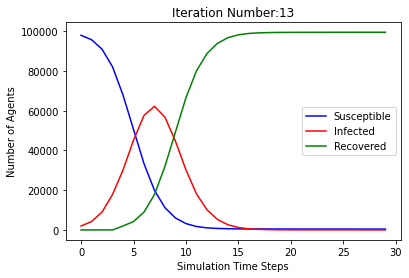

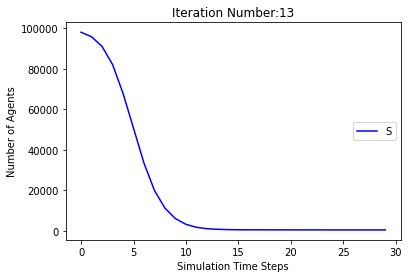

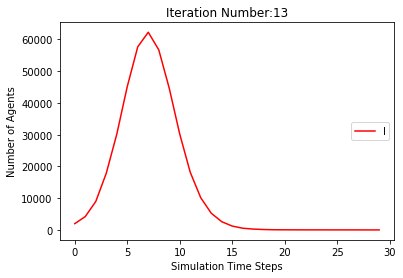

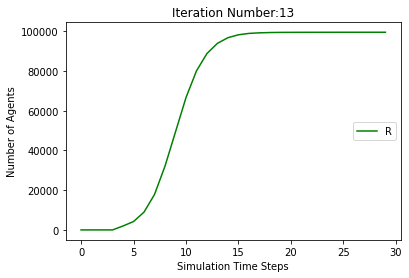

[98027, 95570, 90578, 81115, 66135, 47905, 30182, 17058, 8907, 4550, 2307, 1217, 783, 563, 452, 401, 388, 379, 376, 374, 372, 372, 372, 372, 372]
[1973, 4430, 9422, 18885, 31892, 47665, 60396, 64057, 57228, 43355, 27875, 15841, 8124, 3987, 1855, 816, 395, 184, 76, 27, 16, 7, 4, 2, 0]
[0, 0, 0, 0, 1973, 4430, 9422, 18885, 33865, 52095, 69818, 82942, 91093, 95450, 97693, 98783, 99217, 99437, 99548, 99599, 99612, 99621, 99624, 99626, 99628]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 48342, 30505, 16755, 8299, 3822, 1715, 892, 5

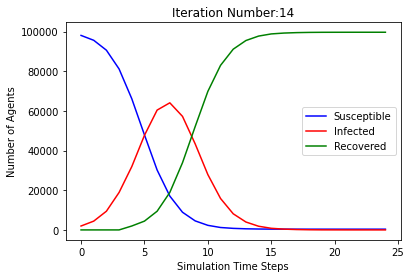

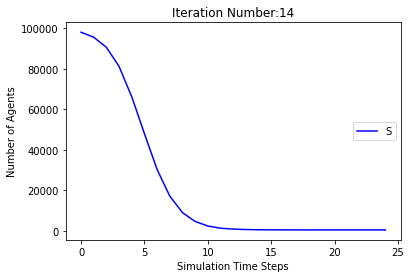

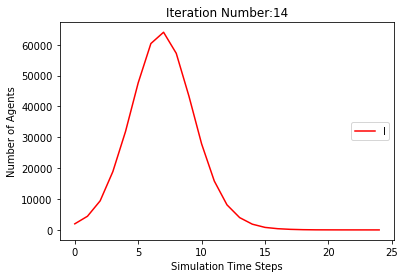

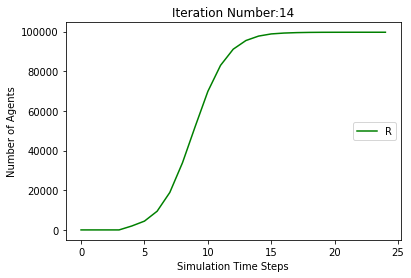

[98027, 95648, 90538, 81129, 66814, 49516, 32655, 19853, 11468, 6386, 3523, 1998, 1242, 880, 693, 605, 551, 534, 526, 523, 520, 519, 517, 516, 516, 516, 516, 516]
[1973, 4352, 9462, 18871, 31213, 46132, 57883, 61276, 55346, 43130, 29132, 17855, 10226, 5506, 2830, 1393, 691, 346, 167, 82, 31, 15, 9, 7, 4, 3, 1, 0]
[0, 0, 0, 0, 1973, 4352, 9462, 18871, 33186, 50484, 67345, 80147, 88532, 93614, 96477, 98002, 98758, 99120, 99307, 99395, 99449, 99466, 99474, 99477, 99480, 99481, 99483, 99484]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 6

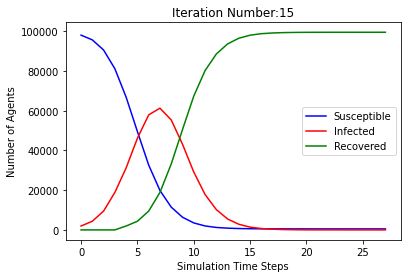

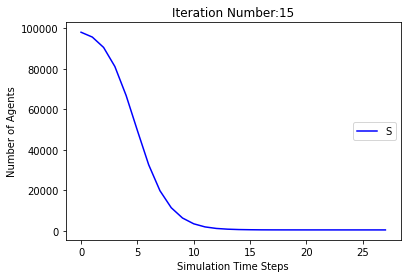

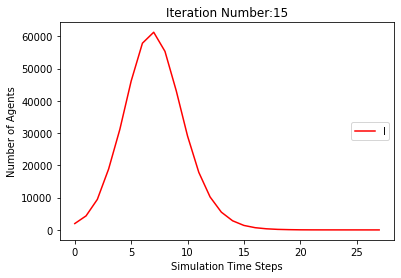

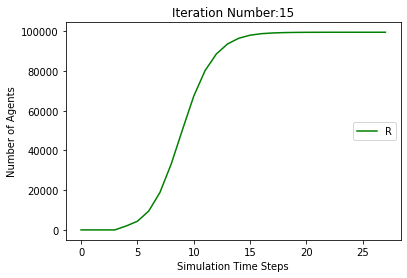

[98027, 95672, 90800, 81838, 67566, 49865, 32837, 19731, 11175, 6272, 3563, 2177, 1512, 1175, 978, 866, 799, 763, 741, 721, 713, 702, 694, 689, 688, 687, 687, 687, 686, 686, 686, 686, 686]
[1973, 4328, 9200, 18162, 30461, 45807, 57963, 62107, 56391, 43593, 29274, 17554, 9663, 5097, 2585, 1311, 713, 412, 237, 145, 86, 61, 47, 32, 25, 15, 7, 2, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 1973, 4328, 9200, 18162, 32434, 50135, 67163, 80269, 88825, 93728, 96437, 97823, 98488, 98825, 99022, 99134, 99201, 99237, 99259, 99279, 99287, 99298, 99306, 99311, 99312, 99313, 99313, 99313, 99314]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 4

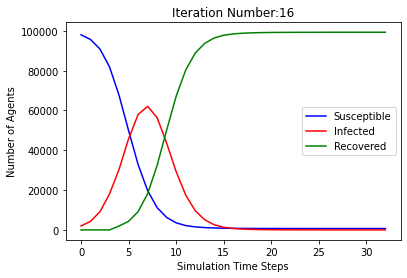

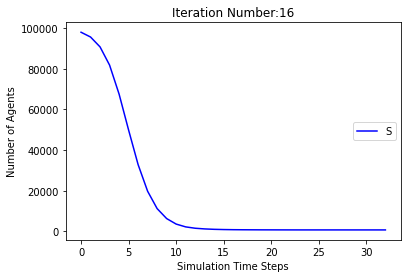

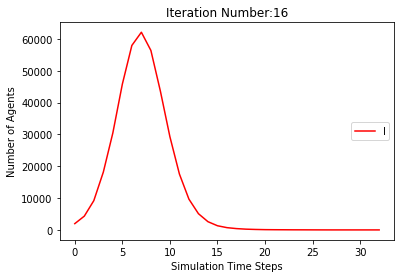

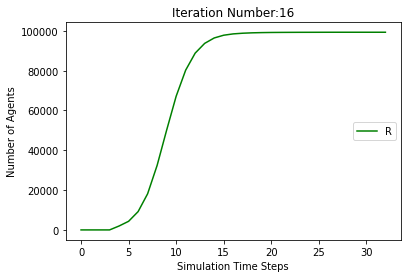

[98027, 95565, 90400, 81095, 66771, 49423, 32210, 18744, 10128, 5250, 2701, 1465, 897, 625, 486, 429, 400, 391, 382, 377, 376, 376, 375, 375, 375, 375, 375]
[1973, 4435, 9600, 18905, 31256, 46142, 58190, 62351, 56643, 44173, 29509, 17279, 9231, 4625, 2215, 1036, 497, 234, 104, 52, 24, 15, 7, 2, 1, 1, 0]
[0, 0, 0, 0, 1973, 4435, 9600, 18905, 33229, 50577, 67790, 81256, 89872, 94750, 97299, 98535, 99103, 99375, 99514, 99571, 99600, 99609, 99618, 99623, 99624, 99624, 99625]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 48342, 3050

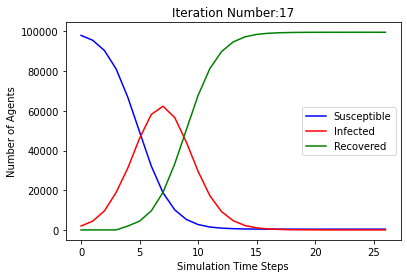

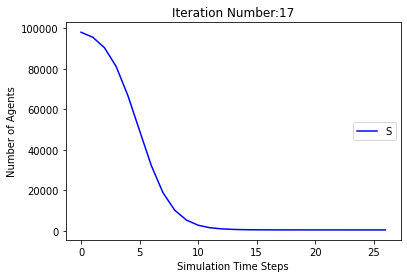

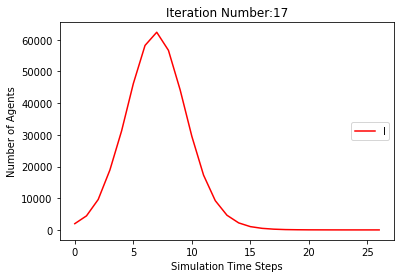

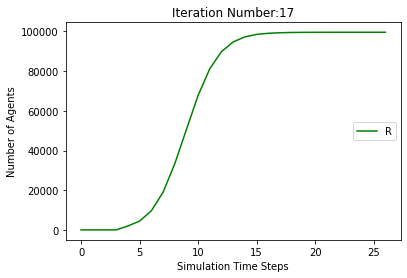

[98027, 95614, 90529, 81098, 66307, 48347, 31315, 18381, 10259, 5530, 2971, 1639, 998, 680, 531, 473, 445, 432, 426, 424, 423, 422, 422, 421, 421, 421, 421, 421]
[1973, 4386, 9471, 18902, 31720, 47267, 59214, 62717, 56048, 42817, 28344, 16742, 9261, 4850, 2440, 1166, 553, 248, 105, 49, 22, 10, 4, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 1973, 4386, 9471, 18902, 33693, 51653, 68685, 81619, 89741, 94470, 97029, 98361, 99002, 99320, 99469, 99527, 99555, 99568, 99574, 99576, 99577, 99578, 99578, 99579]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 664

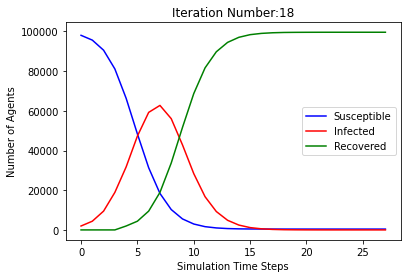

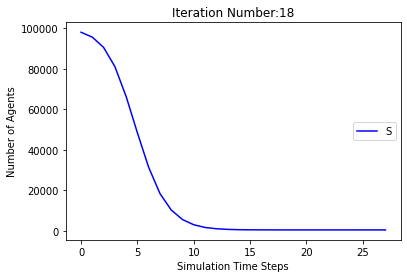

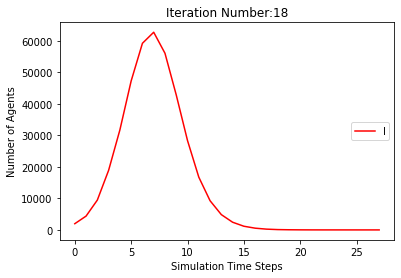

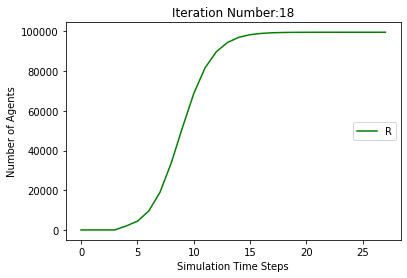

[98027, 95646, 90522, 81148, 66331, 48590, 31736, 19286, 11279, 6380, 3626, 2180, 1456, 1059, 876, 781, 728, 705, 688, 676, 672, 666, 665, 663, 663, 661, 659, 659, 658, 658, 658, 658, 658]
[1973, 4354, 9478, 18852, 31696, 47056, 58786, 61862, 55052, 42210, 28110, 17106, 9823, 5321, 2750, 1399, 728, 354, 188, 105, 56, 39, 23, 13, 9, 5, 6, 4, 5, 3, 1, 1, 0]
[0, 0, 0, 0, 1973, 4354, 9478, 18852, 33669, 51410, 68264, 80714, 88721, 93620, 96374, 97820, 98544, 98941, 99124, 99219, 99272, 99295, 99312, 99324, 99328, 99334, 99335, 99337, 99337, 99339, 99341, 99341, 99342]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495

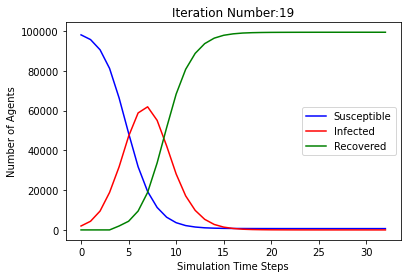

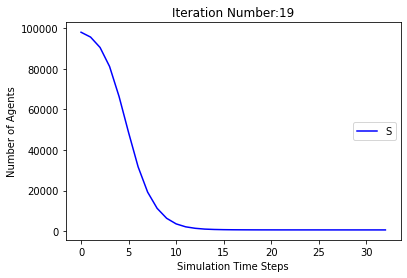

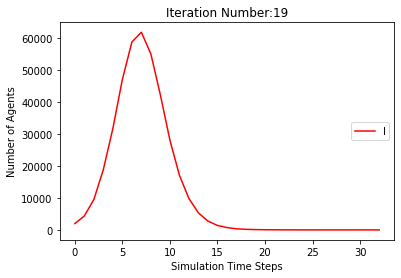

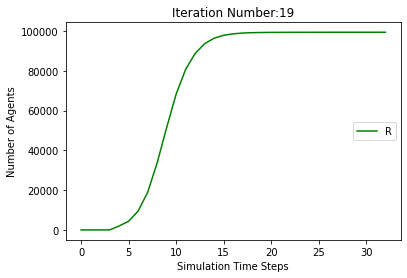

[98027, 95553, 90389, 80699, 65511, 47374, 29979, 17137, 9348, 5050, 2739, 1562, 1067, 806, 676, 587, 548, 523, 515, 504, 501, 498, 497, 492, 492, 491, 491, 491, 491, 491]
[1973, 4447, 9611, 19301, 32516, 48179, 60410, 63562, 56163, 42324, 27240, 15575, 8281, 4244, 2063, 975, 519, 283, 161, 83, 47, 25, 18, 12, 9, 7, 6, 1, 1, 0]
[0, 0, 0, 0, 1973, 4447, 9611, 19301, 34489, 52626, 70021, 82863, 90652, 94950, 97261, 98438, 98933, 99194, 99324, 99413, 99452, 99477, 99485, 99496, 99499, 99502, 99503, 99508, 99508, 99509]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [

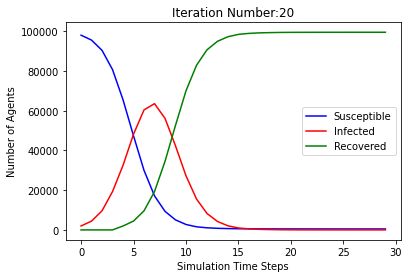

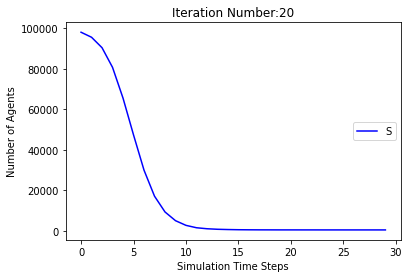

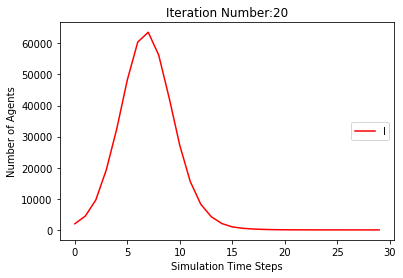

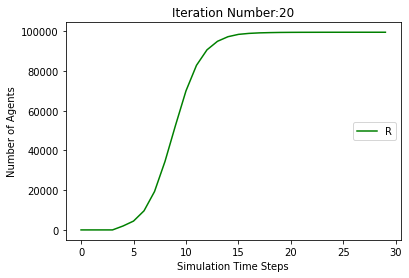

[98027, 95594, 90591, 81319, 66860, 49514, 32480, 19113, 10351, 5294, 2672, 1385, 856, 601, 498, 452, 436, 423, 419, 418, 418, 418, 418, 418]
[1973, 4406, 9409, 18681, 31167, 46080, 58111, 62206, 56509, 44220, 29808, 17728, 9495, 4693, 2174, 933, 420, 178, 79, 34, 18, 5, 1, 0]
[0, 0, 0, 0, 1973, 4406, 9409, 18681, 33140, 50486, 67520, 80887, 89649, 94706, 97328, 98615, 99144, 99399, 99502, 99548, 99564, 99577, 99581, 99582]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 48342, 30505, 16755, 8299, 3822, 1715, 892, 573, 449, 382, 

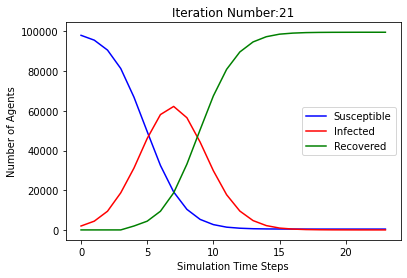

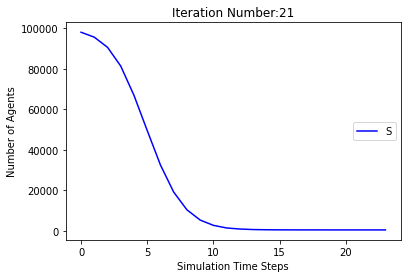

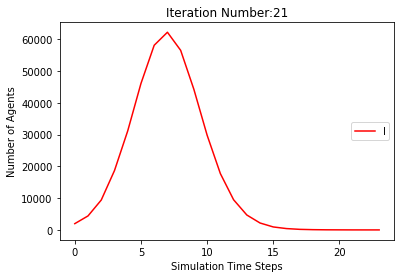

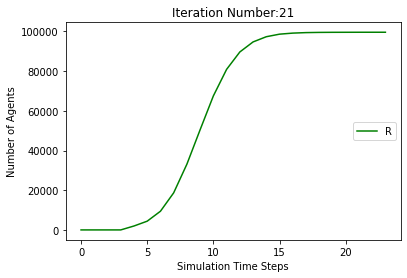

[98027, 95693, 90651, 81108, 65872, 47236, 29216, 15900, 8120, 4132, 2084, 1175, 760, 592, 491, 446, 433, 424, 417, 414, 412, 411, 410, 410, 410, 410, 410]
[1973, 4307, 9349, 18892, 32155, 48457, 61435, 65208, 57752, 43104, 27132, 14725, 7360, 3540, 1593, 729, 327, 168, 74, 32, 21, 13, 7, 4, 2, 1, 0]
[0, 0, 0, 0, 1973, 4307, 9349, 18892, 34128, 52764, 70784, 84100, 91880, 95868, 97916, 98825, 99240, 99408, 99509, 99554, 99567, 99576, 99583, 99586, 99588, 99589, 99590]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 48342, 30505, 

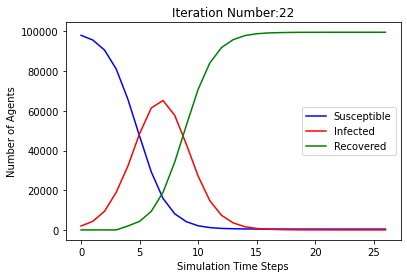

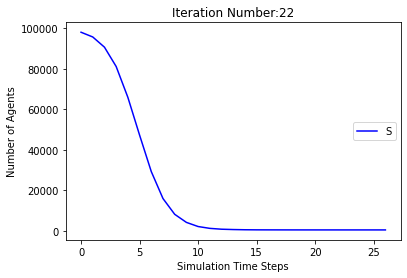

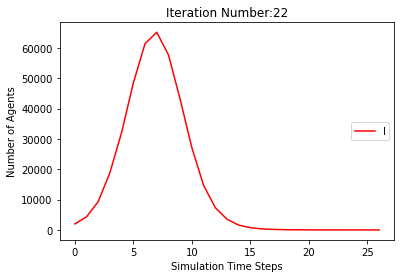

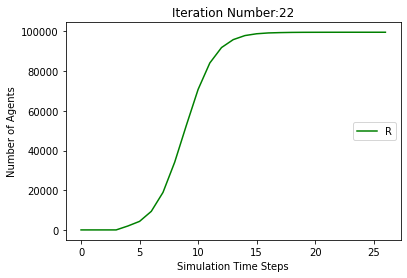

[98027, 95679, 90576, 81158, 66315, 48219, 30549, 17279, 9229, 4908, 2663, 1507, 959, 720, 573, 498, 462, 457, 447, 444, 443, 442, 442, 442, 442, 442]
[1973, 4321, 9424, 18842, 31712, 47460, 60027, 63879, 57086, 43311, 27886, 15772, 8270, 4188, 2090, 1009, 497, 263, 126, 54, 19, 15, 5, 2, 1, 0]
[0, 0, 0, 0, 1973, 4321, 9424, 18842, 33685, 51781, 69451, 82721, 90771, 95092, 97337, 98493, 99041, 99280, 99427, 99502, 99538, 99543, 99553, 99556, 99557, 99558]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 48342, 30505, 16755, 8299, 

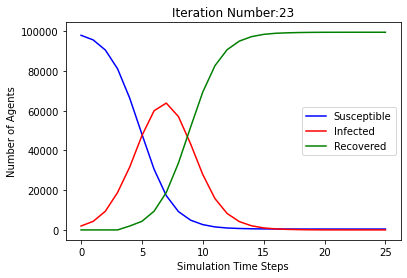

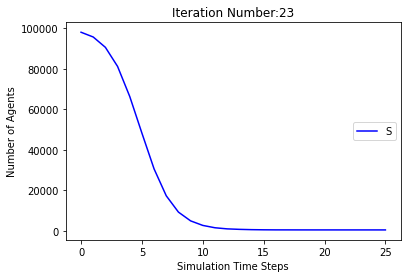

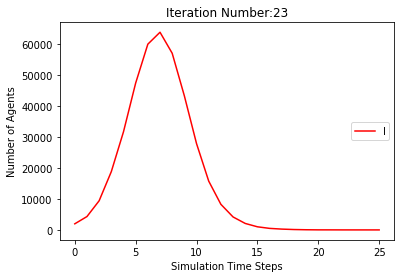

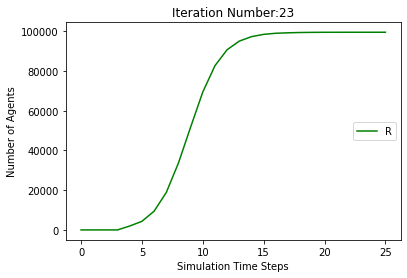

[98027, 95618, 90434, 80984, 65817, 47579, 29533, 16371, 8308, 4040, 1916, 982, 637, 480, 410, 375, 365, 360, 360, 360, 359, 359, 359, 359, 359]
[1973, 4382, 9566, 19016, 32210, 48039, 60901, 64613, 57509, 43539, 27617, 15389, 7671, 3560, 1506, 607, 272, 120, 50, 15, 6, 1, 1, 1, 0]
[0, 0, 0, 0, 1973, 4382, 9566, 19016, 34183, 52421, 70467, 83629, 91692, 95960, 98084, 99018, 99363, 99520, 99590, 99625, 99635, 99640, 99640, 99640, 99641]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 48342, 30505, 16755, 8299, 3822, 1715, 892, 573

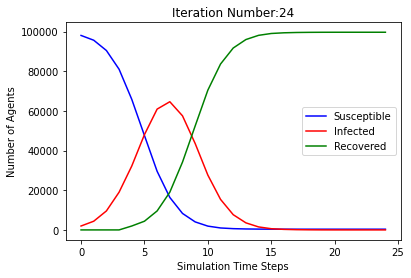

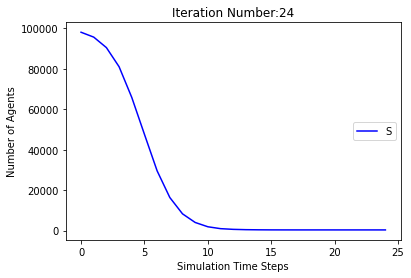

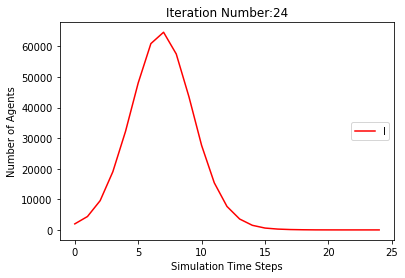

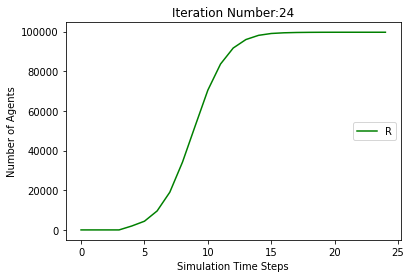

[98027, 95665, 90488, 80966, 66105, 48248, 30892, 17430, 9097, 4423, 2159, 1186, 745, 566, 476, 433, 400, 386, 375, 370, 367, 367, 367, 367, 367]
[1973, 4335, 9512, 19034, 31922, 47417, 59596, 63536, 57008, 43825, 28733, 16244, 8352, 3857, 1683, 753, 345, 180, 101, 63, 33, 19, 8, 3, 0]
[0, 0, 0, 0, 1973, 4335, 9512, 19034, 33895, 51752, 69108, 82570, 90903, 95577, 97841, 98814, 99255, 99434, 99524, 99567, 99600, 99614, 99625, 99630, 99633]
[[], [98027, 95612, 90481, 80788, 65517, 47366, 29737, 16559, 8651, 4501, 2374, 1373, 916, 672, 547, 486, 463, 444, 441, 435, 432, 430, 430, 430, 430, 430], [98027, 95668, 90710, 81577, 66993, 48882, 31271, 18035, 9764, 5026, 2614, 1458, 923, 659, 541, 480, 451, 437, 429, 423, 421, 420, 419, 419, 419, 419, 419], [98027, 95731, 90834, 81224, 66164, 48392, 30818, 17519, 9439, 5090, 2787, 1633, 1056, 776, 638, 564, 521, 502, 495, 490, 488, 488, 488, 487, 487, 487, 487, 487], [98027, 95663, 90623, 81261, 66407, 48342, 30505, 16755, 8299, 3822, 1715, 892,

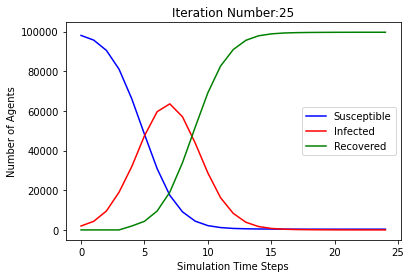

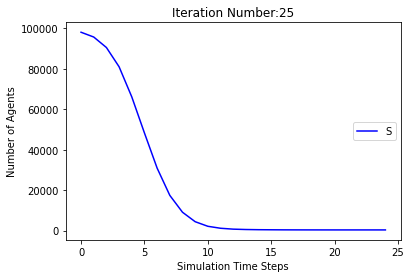

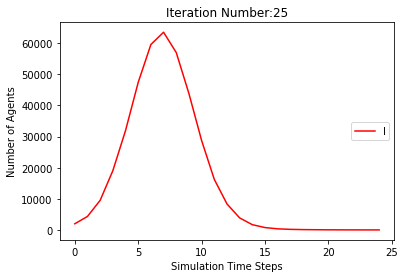

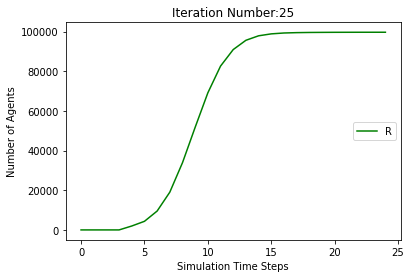

In [ ]:
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(100):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

In [ ]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  


  
